In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math

In [2]:
# Load in feature
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv")

# Intialize variable
all_feature_vals = []
nRoA_results = []
nRoA_plot = []

In [3]:
# Iterate through all features
for count, feature in enumerate(features):
    

    # Add all feature values (eroded and non eroded) to a list
    all_feature_vals.extend(features[str(feature)])
    all_feature_vals.extend(erodedFeatures[str(feature)])

    # Calculate bias
    bias = features[str(feature)] - erodedFeatures[str(feature)]

    # For LTE feature, eliminate NaN values
    if "LTE" in feature:
        all_feature_vals = [x for x in all_feature_vals if not(math.isnan(x))]
        bias = [x for x in bias if not(math.isnan(x))]

    # Find mean feature val
    mean_feature_val = mean(all_feature_vals)

    # Calculate CI
    mean_bias = mean(bias)
    sd = np.std(bias)
    lower_lim = mean_bias - sd*1.96
    upper_lim = mean_bias + sd*1.96

    # Calculate normalized range of agreement
    nRoA = ((upper_lim - lower_lim) / abs(mean_feature_val)) 
    #print(f"{feature} nRoA: {nRoA}")
    nRoA_results.append([feature, nRoA])

    # Reset feature value list
    all_feature_vals = []

df = pd.DataFrame(nRoA_results)


In [4]:
# Sort data frame by nRoA value and export values
sorteddf= df.sort_values(by = 1)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/nRoA_vals.xlsx")

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[0]):
    sorteddf.iloc[entryNum,0] = entryNum

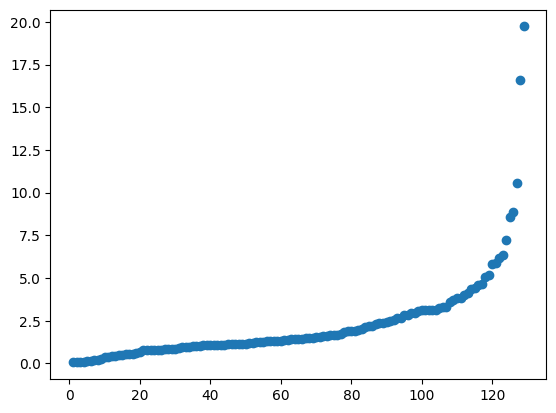

In [6]:
# Plot nRoA values of each feature from smalles to largest
plt.pyplot.scatter(x= sorteddf.iloc[1:135,0],y = sorteddf.iloc[1:135,1])
plt.pyplot.show()

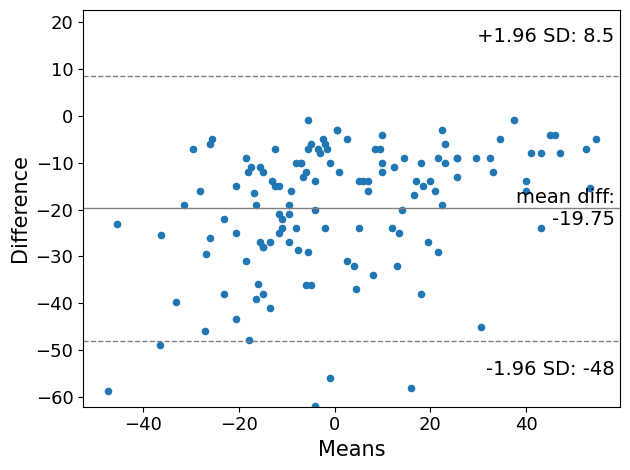

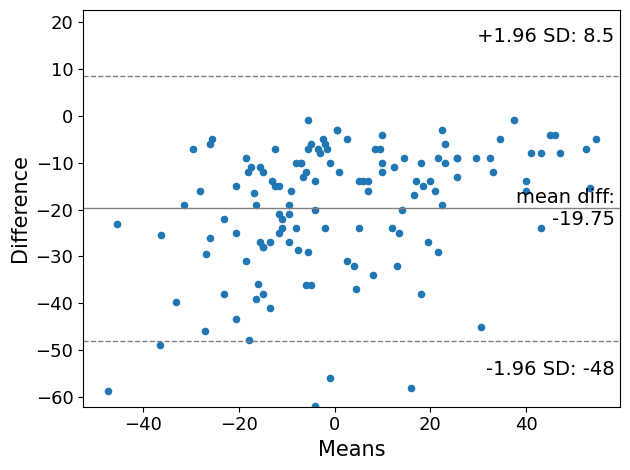

In [46]:
# Make Bland-Altman plot of one feature
sm.graphics.mean_diff_plot(features['original_firstorder_10Percentile'], erodedFeatures['original_firstorder_10Percentile'])